<a href="https://colab.research.google.com/github/JhonCaicedo0612/Especializacion-IA/blob/main/Sesgos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Importamos los modulos mas importantes</h2>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split

from google.colab import widgets
# For facets
from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h2>Cargamos el dataset HEART DISEASE</h2>

In [ ]:
!git clone https://github.com/PandorasActor0/sesgosclasification

Cloning into 'sesgosclasification'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), 5.64 KiB | 5.64 MiB/s, done.


Only 14 attributes used:
1. #3 (age)
2. #4 (sex)(1 = male; 0 = female)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)

In [ ]:
df = pd.read_csv('sesgosclasification/heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

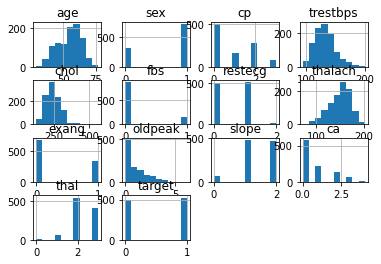

In [ ]:
df.hist()

In [ ]:
X = df.loc[:,["age", "sex", "cp", "trestbps", "chol",
           "fbs", "restecg", "thalach", "exang", "oldpeak",
           "slope", "ca", "thal","target"]]

X_entr, X_prue = train_test_split(X, test_size=0.3, random_state=0, stratify=X)

In [ ]:
#@title Visualize the Data in Facets
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': X_entr, 'name': 'trainData'}]
heartdisease = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(heartdisease.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [ ]:
#@title Set the Number of Data Points to Visualize in Facets Dive

SAMPLE_SIZE = 717 #@param
  
train_dive = X_entr.sample(SAMPLE_SIZE).to_json(orient='records')
HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=train_dive)
display(HTML(html))

In [ ]:
feature = 'sex' #@param ["", "age", "sex", "thalach", "exang", "ca"] {allow-input: false}


if feature == "age":
  print(
'''"age" Se encuentra con mucha variacion,a partir de esto se podria correlaccionar 
las distintas variables dadas por el dataset,
teniendo en cuenta esto se podria entender la 
cantidad de personas con enfermedades cardiacas,
asi mismo podria reducir un sobreajuste.''')
if feature == "sex":
  print(
"""'sex' El conjunto de datos podría permitir a 
los investigadores examinar la relación entre el género 
y la incidencia de diferentes enfermedades cardiovasculares.
también podría permitir la identificación de patrones 
de los datos entre hombres y mujeres.""")
if feature == "thalach":
  print(
"""'thalach'La frecuencia cardíaca máxima se define como el número máximo
 de latidos del corazón por minuto que una persona puede 
 alcanzar durante el ejercicio o durante una actividad física 
 intensa. Esta información es importante para determinar la 
 capacidad cardiovascular de un individuo, evaluar el riesgo de 
 enfermedades cardiovasculares, esto podría permitir a los 
 investigadores examinar la relación entre la edad, 
 el género, el nivel de actividad física y otros factores de 
 riesgo y la frecuencia cardiaca máxima alcanzada. También podría 
 permitir la identificación de patrones en la frecuencia cardíaca 
 máxima en diferentes situaciones, lo que podría tener 
 implicaciones para el diseño de programas de entrenamiento 
 físico y la prevención de enfermedades cardiovasculares. """)
if feature == "exang":
  print(
"""'exang'referencia a la presencia o ausencia de angina de 
pecho durante el ejercicio. La angina de pecho es un dolor 
o molestia en el pecho que se produce cuando el corazón no 
recibe suficiente sangre y oxígeno. Este dolor es causado por 
una obstrucción en las arterias coronarias, que son las que 
suministran sangre al corazón; esta se indica de forma binaria,
en donde los datos dados por este dataset varia en torno a una alta
probabilidad de no tener una angina.""")
if feature == "ca":
  print(
'''"ca" se refiere a la cantidad de vasos sanguíneos importantes
 que están obstruidos en el corazón de un paciente, detectados 
 mediante el uso de fluoroscopia; esta indica la cantidad de vasos
 obstruidos se toma de 0-3, en este caso se tiene una probabilidad 
 alta de tener vasos obstruidos siempre y cuando tengas mayor edad,
 en muy pocos casos se tiene en personas jovenes.''')


'sex' El conjunto de datos podría permitir a 
los investigadores examinar la relación entre el género 
y la incidencia de diferentes enfermedades cardiovasculares.
también podría permitir la identificación de patrones 
de los datos entre hombres y mujeres.


In [ ]:
def pandas_to_numpy(data):
  '''Convert a pandas DataFrame into a Numpy array'''
  # Drop empty rows.
  data = data.dropna(how="any", axis=0)

  # Separate DataFrame into two Numpy arrays.
  labels = np.array(data['target'] == "1")
  features = data.drop('target', axis=1)
  features = {name:np.array(value) for name, value in features.items()}
  
  return features, labels

In [ ]:
# For the remaining categorical features, since we know what the possible values
# are, we can be more explicit and use categorical_column_with_vocabulary_list()
sex = tf.feature_column.categorical_column_with_vocabulary_list(
    "sex", [0, 1])
cp = tf.feature_column.categorical_column_with_vocabulary_list(
    "cp", [0, 1, 2, 3])
fbs = tf.feature_column.categorical_column_with_vocabulary_list(
    "fbs", [0, 1])
restecg = tf.feature_column.categorical_column_with_vocabulary_list(
    "restecg", [0, 1, 2])
exang = tf.feature_column.categorical_column_with_vocabulary_list(
    "exang", [0, 1])
slope = tf.feature_column.categorical_column_with_vocabulary_list(
    "slope", [0, 1, 2])
ca = tf.feature_column.categorical_column_with_vocabulary_list(
    "ca", [0, 1, 2, 3, 4])
thal = tf.feature_column.categorical_column_with_vocabulary_list(
    "thal", [0, 1, 2, 3])

COl num

In [ ]:
age = tf.feature_column.numeric_column("age")
trestbps = tf.feature_column.numeric_column("trestbps")
chol = tf.feature_column.numeric_column("chol")
thalach = tf.feature_column.numeric_column("thalach")
oldpeak = tf.feature_column.numeric_column("oldpeak")

In [ ]:
age_buckets = tf.feature_column.bucketized_column(
    age, boundaries=[30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])
trestbps_buckets = tf.feature_column.bucketized_column(
    trestbps, boundaries=[100, 110, 120, 130, 150, 160, 170, 180, 190, 200])
chol_buckets = tf.feature_column.bucketized_column(
    chol, boundaries=[150, 200, 250, 300, 350, 400, 450, 600])
thalach_buckets = tf.feature_column.bucketized_column(
    thalach, boundaries=[84, 98, 110, 130, 140, 150, 170, 180, 200, 210])
oldpeak_buckets = tf.feature_column.bucketized_column(
    oldpeak, boundaries=[0.85, 1.3, 1.9, 2.6, 3.3, 3.9, 4.5, 5.9, 6.5])

In [ ]:
variables = [cp, fbs, restecg, exang, 
             slope, ca, thal, trestbps_buckets, age_buckets, chol_buckets, thalach_buckets, oldpeak_buckets]
subgroup_variables = [sex]
feature_columns = variables + subgroup_variables

In [ ]:
deep_columns = [
    tf.feature_column.indicator_column(cp),
    tf.feature_column.indicator_column(fbs),
    tf.feature_column.indicator_column(restecg),
    tf.feature_column.indicator_column(exang),
    tf.feature_column.indicator_column(slope),
    tf.feature_column.indicator_column(ca),
    tf.feature_column.indicator_column(thal),
    tf.feature_column.indicator_column(trestbps_buckets),
    tf.feature_column.indicator_column(age_buckets),
    tf.feature_column.indicator_column(chol_buckets),
    tf.feature_column.indicator_column(thalach_buckets),
    tf.feature_column.indicator_column(oldpeak_buckets),
]

In [ ]:
#@title Define Deep Neural Net Model

# Parameters from form fill-ins
HIDDEN_UNITS_LAYER_01 = 450 #@param
HIDDEN_UNITS_LAYER_02 = 130 #@param
LEARNING_RATE = 0.01 #@param
L1_REGULARIZATION_STRENGTH = 0.001 #@param
L2_REGULARIZATION_STRENGTH = 0.001 #@param

RANDOM_SEED = 717
tf.random.set_seed(RANDOM_SEED)

# List of built-in metrics that we'll need to evaluate performance.
METRICS = [
  tf.keras.metrics.TruePositives(name='tp'),
  tf.keras.metrics.FalsePositives(name='fp'),
  tf.keras.metrics.TrueNegatives(name='tn'),
  tf.keras.metrics.FalseNegatives(name='fn'), 
  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
  tf.keras.metrics.Precision(name='precision'),
  tf.keras.metrics.Recall(name='recall'),
  tf.keras.metrics.AUC(name='auc'),
]

regularizer = tf.keras.regularizers.l1_l2(
    l1=L1_REGULARIZATION_STRENGTH, l2=L2_REGULARIZATION_STRENGTH)

model = tf.keras.Sequential([
  layers.DenseFeatures(deep_columns),
  layers.Dense(
      HIDDEN_UNITS_LAYER_01, activation='relu', kernel_regularizer=regularizer),
  layers.Dense(
      HIDDEN_UNITS_LAYER_02, activation='relu', kernel_regularizer=regularizer),
  layers.Dense(
      1, activation='sigmoid', kernel_regularizer=regularizer)
])

model.compile(optimizer=tf.keras.optimizers.Adam(LEARNING_RATE),  
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)

In [ ]:
#@title Fit Deep Neural Net Model to the Adult Training Dataset

EPOCHS = 100 #@param
BATCH_SIZE = 10 #@param

features, labels = pandas_to_numpy(X_entr)
model.fit(x=features, y=labels, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/100


72/72 [==============================] - 2s 3ms/step - loss: 0.8384 - tp: 0.0000e+00 - fp: 7.0000 - tn: 710.0000 - fn: 0.0000e+00 - accuracy: 0.9902 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00
Epoch 2/100
72/72 [==============================] - 0s 3ms/step - loss: 0.1363 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 717.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00
Epoch 3/100
72/72 [==============================] - 0s 3ms/step - loss: 0.1209 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 717.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00
Epoch 4/100
72/72 [==============================] - 0s 3ms/step - loss: 0.1170 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 717.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00
Epoch 5/100
72/72 [==============================] - 0s 3ms/step - loss: 0.1155 - tp: 0.0000e+00 - fp: 0

In [ ]:
#@title Evaluate Deep Neural Net Performance

features, labels = pandas_to_numpy(X_prue)
model.evaluate(x=features, y=labels);

10/10 [==============================] - 1s 4ms/step - loss: 8.2771 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 308.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0000e+00


In [ ]:
#@title Define Function to Visualize Binary Confusion Matrix
def plot_confusion_matrix(
    confusion_matrix, class_names, subgroup, figsize = (8,6)):
  # We're taking our calculated binary confusion matrix that's already in the 
  # form of an array and turning it into a pandas DataFrame because it's a lot 
  # easier to work with a pandas DataFrame when visualizing a heat map in 
  # Seaborn.
  df_cm = pd.DataFrame(
      confusion_matrix, index=class_names, columns=class_names, 
  )

  rcParams.update({
  'font.family':'sans-serif',
  'font.sans-serif':['Liberation Sans'],
  })
  
  sns.set_context("notebook", font_scale=1.25)

  fig = plt.figure(figsize=figsize)


  # Combine the instance (numercial value) with its description
  strings = np.asarray([['True Positives', 'False Negatives'],
                        ['False Positives', 'True Negatives']])
  labels = (np.asarray(
      ["{0:g}\n{1}".format(value, string) for string, value in zip(
          strings.flatten(), confusion_matrix.flatten())])).reshape(2, 2)

  heatmap = sns.heatmap(df_cm, annot=labels, fmt="", 
      linewidths=2.0, cmap=sns.color_palette("GnBu_d"));
  heatmap.yaxis.set_ticklabels(
      heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  heatmap.xaxis.set_ticklabels(
      heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
  plt.ylabel('References')
  plt.xlabel('Predictions')
  return fig

,ACCURACY,PRECISION,RECALL,AUC
0,1.0000,0.0000,0.0000,0.0000


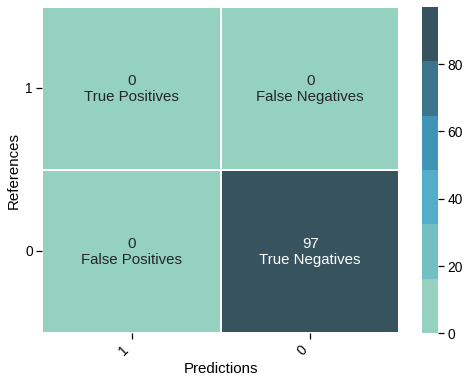

In [ ]:
#@title Visualize Binary Confusion Matrix and Compute Evaluation Metrics Per Subgroup
CATEGORY  =  "sex" #@param {type:"string"}
SUBGROUP = 0 #@param {type:"integer"}

# Labels for annotating axes in plot.
classes = [1, 0]

# Given define subgroup, generate predictions and obtain its corresponding 
# ground truth.
subgroup_filter  = X_prue.loc[X_prue[CATEGORY] == SUBGROUP]
features, labels = pandas_to_numpy(subgroup_filter)
subgroup_results = model.evaluate(x=features, y=labels, verbose=0)
confusion_matrix = np.array([[subgroup_results[1], subgroup_results[4]], 
                             [subgroup_results[2], subgroup_results[3]]])

subgroup_performance_metrics = {
    'ACCURACY': subgroup_results[5],
    'PRECISION': subgroup_results[6], 
    'RECALL': subgroup_results[7],
    'AUC': subgroup_results[8]
}
performance_df = pd.DataFrame(subgroup_performance_metrics, index=[SUBGROUP])
pd.options.display.float_format = '{:,.4f}'.format

plot_confusion_matrix(confusion_matrix, classes, SUBGROUP);
performance_df